In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightkurve as lk

datalist = lk.search_lightcurvefile('KIC10963065', cadence='short')
print(datalist)

SearchResult containing 27 data products.

 target_name            productFilename                        description              distance
------------- ------------------------------------ ------------------------------------ --------
kplr010963065 kplr010963065-2009259162342_slc.fits  Lightcurve Short Cadence (CSC) - Q2      0.0
kplr010963065 kplr010963065-2010111051353_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010140023957_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010174090439_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010203174610_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010234115140_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010265121752_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010296114515_slc.fits  Lightcurve Short Cadence (CSC) -

In [4]:
data = datalist[1:10].download_all()

In [5]:
lc = data[0].PDCSAP_FLUX.normalize().remove_nans().remove_outliers()
for d in data[1:]:
    lc = lc.append(d.PDCSAP_FLUX.normalize().remove_nans().remove_outliers())

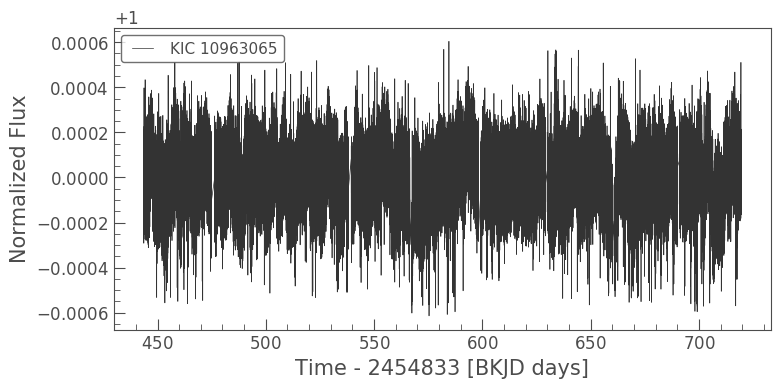

In [6]:
lc.plot()

In [9]:
pg = lc.to_periodogram(normalization='psd')

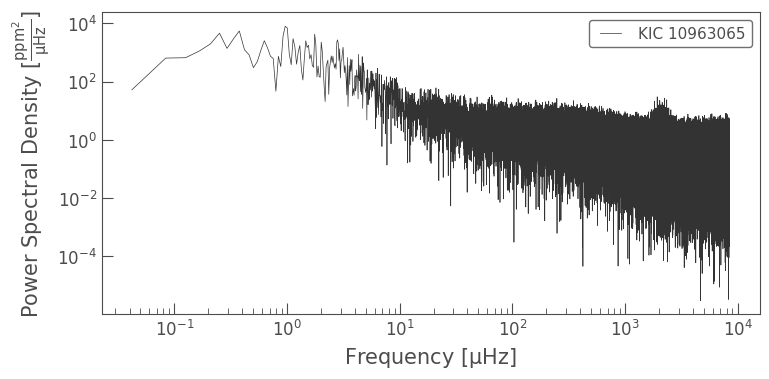

In [11]:
pg.plot(scale='log')

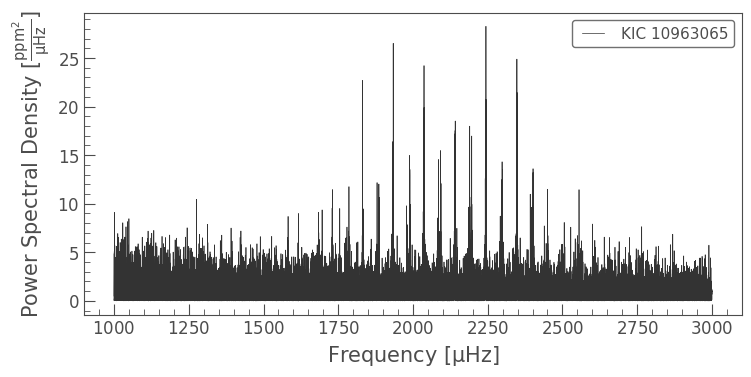

In [12]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency = 1000, maximum_frequency = 3000)
pg.plot()

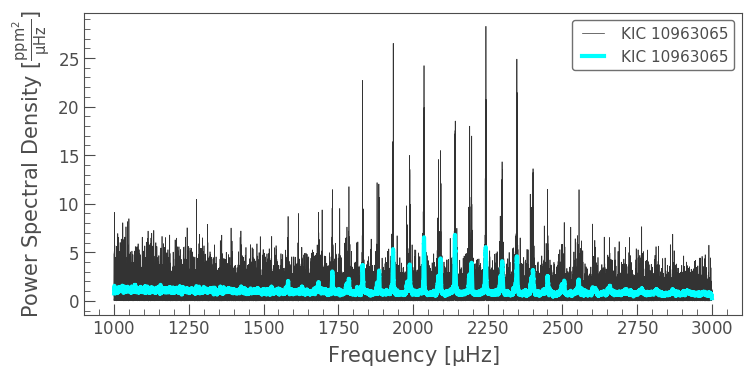

In [14]:
ax = pg.plot()
pg.smooth(filter_width=2.).plot(ax=ax, lw=3, c='cyan')

In [15]:
pg.show_properties()

lightkurve.Periodogram properties:
      Attribute         Description     Units   
---------------------- -------------- ----------
              targetid       10963065           
          default_view      frequency           
                 label   KIC 10963065           
frequency_at_max_power      2244.0321        uHz
             max_power        28.2609 ppm2 / uHz
               nyquist      8496.4268        uHz
   period_at_max_power         0.0004    1 / uHz
             frequency array (47707,)        uHz
                period array (47707,)    1 / uHz
                 power array (47707,) ppm2 / uHz
                  meta <class 'dict'>           


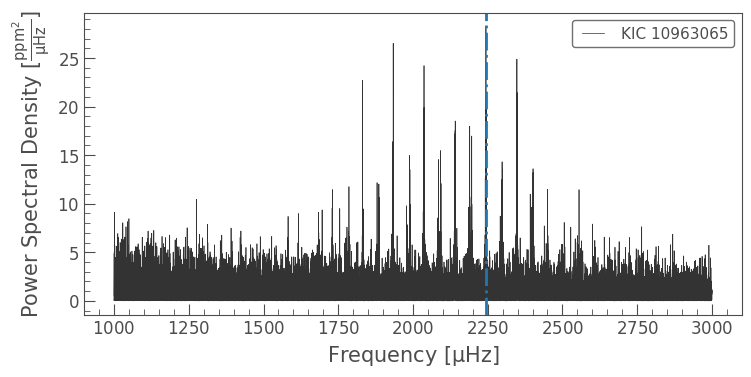

In [17]:
ax = pg.plot()
ax.axvline(2244, lw=2, ls='-.')

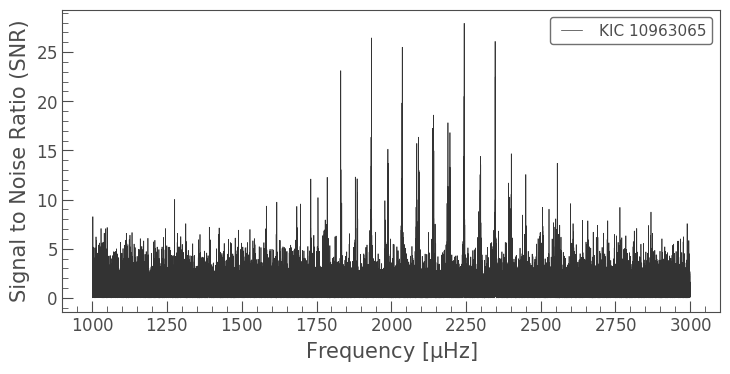

In [18]:
snr = pg.flatten()
snr.plot()

In [20]:
numax = snr.estimate_numax()
numax

<Quantity 2175. uHz>

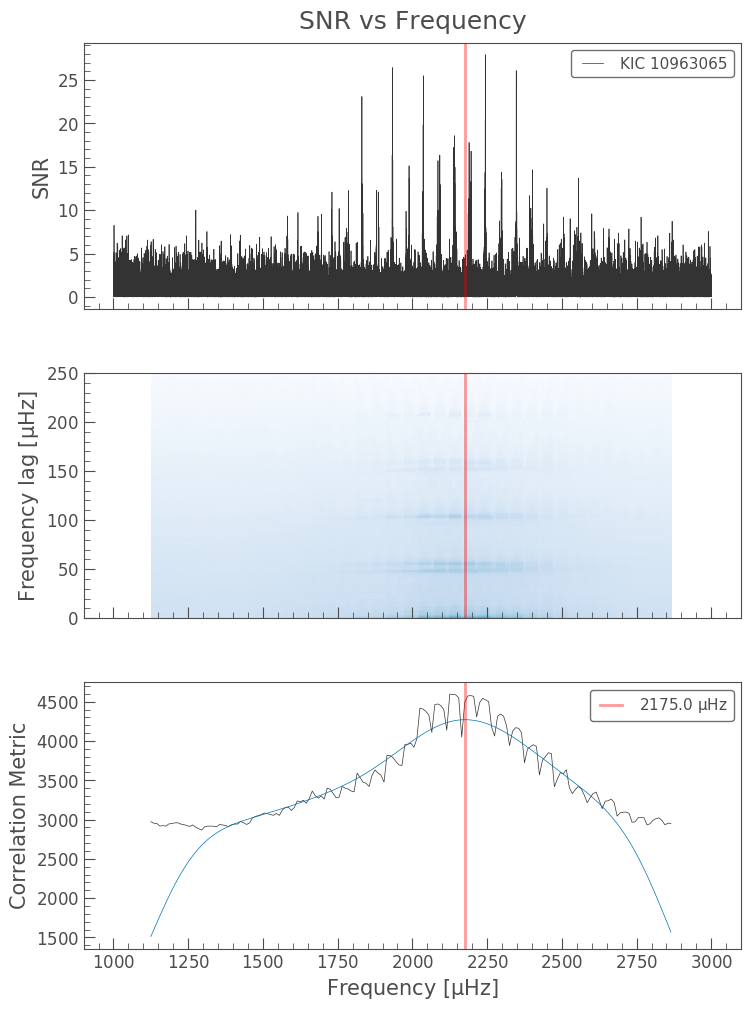

In [21]:
numax, ax = snr.plot_numax_diagnostics()

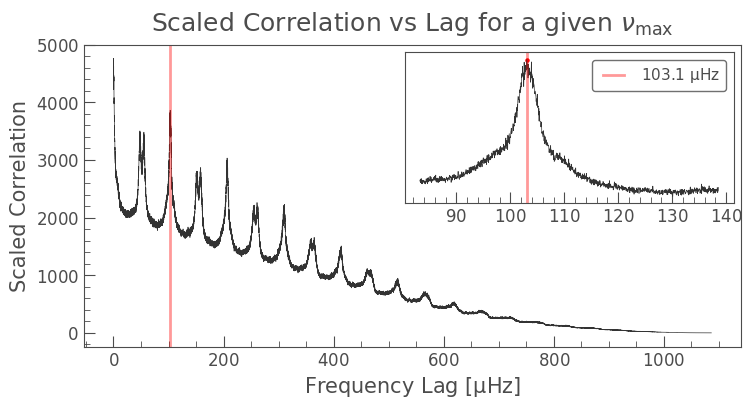

In [22]:
deltanu, ax = snr.plot_deltanu_diagnostics(numax)

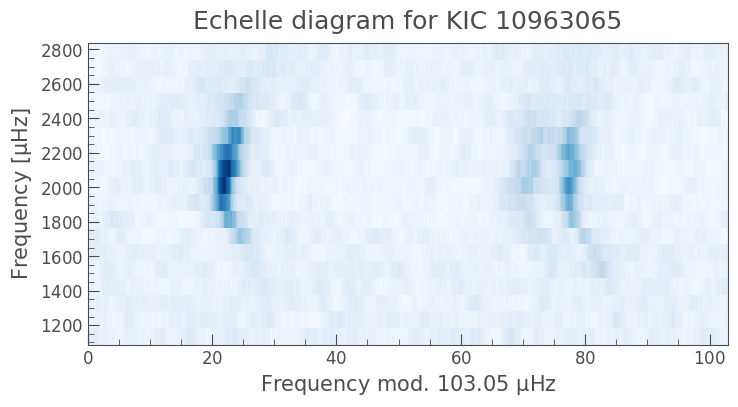

In [24]:
snr.smooth(filter_width=2.).plot_echelle(deltanu, numax)

In [25]:
mass = lk.estimate_mass(numax, deltanu, 6144.)
mass

<Quantity 1.13134354 solMass>

In [28]:
radius = lk.estimate_radius(numax, deltanu, 6144.)
radius

<Quantity 1.24814672 solRad>

In [29]:
logg= lk.estimate_logg(numax, 6144.)

In [32]:
logg.unit

Unit("dex")